In [1]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np



with open('WHO-COVID-19-global-data.csv','r') as f:
    raw = [row.replace(', including east Jerusalem','').replace('Kosovo[1]','Kosovo').replace('\n','').split(',') for row in f.readlines()]
Mortality_Data = raw[1:]

with open('vaccination-data.csv','r') as f:
    raw = [row.replace('occupied Palestinian territory','"occupied Palestinian territory"').replace('\n','').split(',')[:11] for row in f.readlines()]
Vax_Data = raw[1:]

with open('vaccination-data.csv','r') as f:
    raw = [row.replace('occupied Palestinian territory','"occupied Palestinian territory"').replace('\n','').split(',')[-1] for row in f.readlines()]  
Vax_Data_Right = raw[1:]

with open('vaccination-data.csv','r') as f:
    raw = [row.replace('occupied Palestinian territory','"occupied Palestinian territory"').replace('\n','').split(',')[:3] for row in f.readlines()]  
Region_Data = raw[1:]

for i in range(len(Vax_Data)):
    Vax_Data[i].append(Vax_Data_Right[i])

Vax_Nations = []
for items in Vax_Data:
    Vax_Nations.append(items[0])

    
Nations_Union = []
for items in Mortality_Data:
    if int(items[5])>0 and items[2] in Vax_Nations:
        Nations_Union.append(items[2])
Unique_Nations_Union = np.unique(Nations_Union)

Case_Counts_Timeline = []
Death_Counts_Timeline = []
Mortality_Rates = []
Nation_Data = []
Vax_Amount = []
Boost_Amount = []
Region_List = []

for X in Unique_Nations_Union:
    for Y in Mortality_Data:
        if Y[2]==X:
                Case_Counts_Timeline.append(int(Y[5]))
                Death_Counts_Timeline.append(int(Y[7]))
    Mortality_Rates.append(np.max(Death_Counts_Timeline)/np.max(Case_Counts_Timeline))  
    Case_Counts_Timeline = []
    Death_Counts_Timeline = []
    for Z in Vax_Data:
        if Z[0]==X:
            if Z[10] == '': Vax_Float = float(0) #replace blanks with zero
            else:
                Vax_Float = float(Z[10])
            Vax_Amount.append(Vax_Float)
            if Z[11] == '': Boost_Float = float(0)
            else:
                Boost_Float = float(Z[11])
            Boost_Amount.append(Boost_Float)
    for W in Region_Data:
        if W[0]==X:
            Region_List.append(W[2])
                

    
for i in range(len(Unique_Nations_Union)):
    #Nation_Data.append([Vax_Amount[i], Boost_Amount[i], Case_Max[i], Death_Max[i]])
    Nation_Data.append([Vax_Amount[i], Boost_Amount[i], Mortality_Rates[i]])     
      
cluster = AgglomerativeClustering(n_clusters=3).fit(Nation_Data)
K   = []
for i in range(len(Unique_Nations_Union)):
    K += [[Unique_Nations_Union[i],cluster.labels_[i]]]
    if cluster.labels_[i]==1:print(Unique_Nations_Union[i])



American Samoa
Anguilla
Antigua and Barbuda
Aruba
Bangladesh
Belarus
Bonaire
Botswana
Brazil
British Virgin Islands
Cayman Islands
Colombia
Costa Rica
CuraÃ§ao
Czechia
Ecuador
El Salvador
Estonia
Faroe Islands
Fiji
French Polynesia
Greenland
Guam
Hungary
India
Indonesia
Iran (Islamic Republic of)
Israel
Kazakhstan
Kuwait
Lao People's Democratic Republic
Latvia
Liechtenstein
Lithuania
Maldives
Mexico
Monaco
Mongolia
Morocco
Nauru
Nepal
New Caledonia
Nicaragua
Northern Mariana Islands (Commonwealth of the)
Oman
Panama
Philippines
Poland
Rwanda
Samoa
Saudi Arabia
Seychelles
Sint Maarten
Slovenia
Sri Lanka
Switzerland
Thailand
The United Kingdom
Turkey
Turks and Caicos Islands
United States of America
Wallis and Futuna


In [2]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=3).fit(Nation_Data)
K   = []
for i in range(len(Unique_Nations_Union)):
    K += [[Unique_Nations_Union[i],cluster.labels_[i],Region_List[i]]]
    if cluster.labels_[i]==1:print(Unique_Nations_Union[i])

American Samoa
Andorra
Argentina
Australia
Austria
Bahrain
Belgium
Bermuda
Bhutan
Bonaire
Brazil
Brunei Darussalam
Cambodia
Canada
Cayman Islands
Chile
China
Cook Islands
Costa Rica
Cuba
Cyprus
Czechia
Denmark
Ecuador
Faroe Islands
Finland
France
Germany
Gibraltar
Greece
Guam
Hungary
Iceland
Ireland
Isle of Man
Italy
Japan
Jersey
Kuwait
Liechtenstein
Luxembourg
Malaysia
Malta
Mauritius
Mexico
Nauru
Netherlands
New Zealand
Niue
Northern Mariana Islands (Commonwealth of the)
Norway
Palau
Panama
Peru
Portugal
Puerto Rico
Qatar
Republic of Korea
Saba
Samoa
San Marino
Saudi Arabia
Seychelles
Singapore
Spain
Sri Lanka
Sweden
Switzerland
Thailand
Tonga
United Arab Emirates
Uruguay
Viet Nam


C:\Users\PC\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


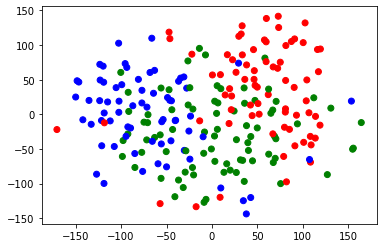

[['"occupied Palestinian territory"', 2, 'EMRO'], ['Afghanistan', 2, 'EMRO'], ['Albania', 0, 'EURO'], ['Algeria', 2, 'AFRO'], ['American Samoa', 1, 'WPRO'], ['Andorra', 1, 'EURO'], ['Angola', 2, 'AFRO'], ['Anguilla', 0, 'AMRO'], ['Antigua and Barbuda', 0, 'AMRO'], ['Argentina', 1, 'AMRO'], ['Armenia', 2, 'EURO'], ['Aruba', 0, 'AMRO'], ['Australia', 1, 'WPRO'], ['Austria', 1, 'EURO'], ['Azerbaijan', 0, 'EURO'], ['Bahamas', 0, 'AMRO'], ['Bahrain', 1, 'EMRO'], ['Bangladesh', 0, 'SEARO'], ['Barbados', 0, 'AMRO'], ['Belarus', 0, 'EURO'], ['Belgium', 1, 'EURO'], ['Belize', 0, 'AMRO'], ['Benin', 2, 'AFRO'], ['Bermuda', 1, 'AMRO'], ['Bhutan', 1, 'SEARO'], ['Bolivia (Plurinational State of)', 0, 'AMRO'], ['Bonaire', 1, 'AMRO'], ['Bosnia and Herzegovina', 2, 'EURO'], ['Botswana', 0, 'AFRO'], ['Brazil', 1, 'AMRO'], ['British Virgin Islands', 0, 'AMRO'], ['Brunei Darussalam', 1, 'WPRO'], ['Bulgaria', 2, 'EURO'], ['Burkina Faso', 2, 'AFRO'], ['Burundi', 2, 'AFRO'], ['Cabo Verde', 0, 'AFRO'], ['Camb

In [3]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plot

colors=[]
for items in K:
    if items[1]==0:
        colors.append('green')
    else:
        if items[1]==1:
            colors.append('red')
        else:
            colors.append('blue')
embed  = TSNE(n_components=3).fit_transform(Nation_Data)
plot.scatter(embed[:,0],embed[:,1],c=colors)
plot.show()
print(K)

In [4]:
AMRO0=0
AMRO1=0
AMRO2=0
WPRO0=0
WPRO1=0
WPRO2=0
EMRO0=0
EMRO1=0
EMRO2=0
EURO0=0
EURO1=0
EURO2=0
SEARO0=0
SEARO1=0
SEARO2=0
AFRO0=0
AFRO1=0
AFRO2=0
OTHER0=0
OTHER1=0
OTHER2=0

for items in K:
    if items[2]=='AMRO' and items[1] == 0:
        AMRO0+=1
    if items[2]=='AMRO' and items[1] == 1:
        AMRO1+=1
    if items[2]=='AMRO' and items[1] == 2:
        AMRO2+=1  
    if items[2]=='WPRO' and items[1] == 0:
        WPRO0+=1
    if items[2]=='WPRO' and items[1] == 1:
        WPRO1+=1
    if items[2]=='WPRO' and items[1] == 2:
        WPRO2+=1     
    if items[2]=='EMRO' and items[1] == 0:
        EMRO0+=1
    if items[2]=='EMRO' and items[1] == 1:
        EMRO1+=1
    if items[2]=='EMRO' and items[1] == 2:
        EMRO2+=1   
    if items[2]=='EURO' and items[1] == 0:
        EURO0+=1
    if items[2]=='EURO' and items[1] == 1:
        EURO1+=1
    if items[2]=='EURO' and items[1] == 2:
        EURO2+=1   
    if items[2]=='SEARO' and items[1] == 0:
        SEARO0+=1
    if items[2]=='SEARO' and items[1] == 1:
        SEARO1+=1
    if items[2]=='SEARO' and items[1] == 2:
        SEARO2+=1           
    if items[2]=='AFRO' and items[1] == 0:
        AFRO0+=1
    if items[2]=='AFRO' and items[1] == 1:
        AFRO1+=1
    if items[2]=='AFRO' and items[1] == 2:
        AFRO2+=1
    if items[2]=='OTHER' and items[1] == 0:
        OTHER0+=1
    if items[2]=='OTHER' and items[1] == 1:
        OTHER1+=1
    if items[2]=='OTHER' and items[1] == 2:
        OTHER2+=1
print('Region: Class 0 | Class 1 | Class 2')        
print('Americas: ' + str(AMRO0) + ' | ' + str(AMRO1) + ' | ' + str(AMRO2))
print('Europe: ' + str(EURO0) + ' | ' + str(EURO1) + ' | ' + str(EURO2))
print('Africa: ' + str(AFRO0) + ' | ' + str(AFRO1) + ' | ' + str(AFRO2))
print('Southeast Asia: ' + str(SEARO0) + ' | ' + str(SEARO1) + ' | ' + str(SEARO2))
print('Eastern Mediterranean: ' + str(EMRO0) + ' | ' + str(EMRO1) + ' | ' + str(EMRO2))
print('Western Pacific: ' + str(WPRO0) + ' | ' + str(WPRO1) + ' | ' + str(WPRO2))
print('Other: ' + str(OTHER0) + ' | ' + str(OTHER1) + ' | ' + str(OTHER2))
print('Total: ' + str(AMRO0+EURO0+AFRO0+SEARO0+EMRO0+WPRO0+OTHER0)+ ' | ' +str(AMRO1+EURO1+AFRO1+SEARO1+EMRO1+WPRO1+OTHER1)+ ' | ' + str(AMRO2+EURO2+AFRO2+SEARO2+EMRO2+WPRO2+OTHER2))

Region: Class 0 | Class 1 | Class 2
Americas: 29 | 16 | 7
Europe: 23 | 27 | 9
Africa: 5 | 2 | 39
Southeast Asia: 7 | 3 | 0
Eastern Mediterranean: 6 | 5 | 11
Western Pacific: 12 | 19 | 2
Other: 0 | 1 | 0
Total: 82 | 73 | 68


In [28]:
Class0M = 0
Class1M = 0
Class2M = 0
Class0V = 0
Class1V = 0
Class2V = 0
Class0B = 0
Class1B = 0
Class2B = 0
Class0L = 0
Class1L = 0
Class2L = 0

for i in range(len(K)):
    if K[i][1] == 0:
        Class0L+=1
        Class0M+=Nation_Data[i][2]
        Class0V+=Nation_Data[i][0]
        Class0B+=Nation_Data[i][1]
        
    if K[i][1] == 1:
        Class1L+=1
        Class1M+=Nation_Data[i][2]
        Class1V+=Nation_Data[i][0]
        Class1B+=Nation_Data[i][1]

    if K[i][1] == 2:
        Class2L+=1
        Class2M+=Nation_Data[i][2]
        Class2V+=Nation_Data[i][0]
        Class2B+=Nation_Data[i][1]

print('Averages:')
print('Statistic: Class 0 | Class 1 | Class 2')
print('Mortality: ' + str(Class0M/Class0L) + ' | ' + str(Class1M/Class1L) + ' | ' + str(Class2M/Class2L))
print('Vaccination Rate: ' + str(Class0V/Class0L) + ' | ' + str(Class1V/Class1L) + ' | ' + str(Class2V/Class2L))
print('Boost Rate: ' + str(Class0B/Class0L) + ' | ' + str(Class1B/Class1L) + ' | ' + str(Class2B/Class2L))
        

Averages:
Statistic: Class 0 | Class 1 | Class 2
Mortality: 0.01153669047565708 | 0.007640139027198891 | 0.022277346595543007
Vaccination Rate: 56.813097560975564 | 80.58468493150686 | 18.98783823529412
Boost Rate: 15.937951219512195 | 54.06071232876712 | 1.7810441176470584
